# Creating an Edge List From Mentions in Twitter

In this notebook, we will use the text file (json format) obtained from Twitter Streaming API and try to extract edge list by including all the mentions between users. You can create other types of relations as discussed earlier. 

In [1]:
import json
import sys
from csv import writer
import time
from datetime import datetime
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('sampledata.txt', 'rU') as in_file:
    
    tweet_count = 0

    for line in in_file:
        tweet_count += 1
        try:
            tweet = json.loads(line)
        except:
            pass

        if not (isinstance(tweet, dict)):
            pass
        elif 'delete' in tweet:
            pass
        elif 'user' not in tweet:
            pass
        else:
            if 'entities' in tweet and len(tweet['entities']['user_mentions']) > 0:
                user = tweet['user']
                user_mentions = tweet['entities']['user_mentions']

                for u2 in user_mentions:
                    print (",".join([user['screen_name'],u2['screen_name']]))

bas1il,AJELNEWS24
D3ATH_2U,gorgeous4ew
_AsmaHz,emadmonshi
3vFG2bAkbySEtlL,AlshrabiAsem
Alhmaedy84,SufwatHaddadin
al_sadria,fa__tim__a
Deangelol3kf,AJELNEWS24
Almis7al73Qtr,MOPHQatar
jjkinjm,wqvz24
alka441,sabqorg
mokabts77,wqvz24
naser61alex,AJA_Egypt
ambaghdadi,emadmonshi
noonnoon200043,salman94134385
manar_alsabeel,Hamid_ALhuthali
manar_alsabeel,badralialotibi1
F_A_kh0,Iimsad_
xinGOKLvvUtG4dT,SaudiMOH
Faisal12849700,SaudiSeasons_
hhmmdd11223,218Tv
GVsZo4MaFGElEfC,waleed12615
alstretsbio,EfxvGe
alstretsbio,ScreenMix
Proxy_Qtr,NadeebQa
tm_nmh,Transparencyne1
razqan8,FCBW_M30
o5HLBv0jGiRuTeJ,t0_d10
o5HLBv0jGiRuTeJ,abu_mshael99
AlqasmiMoh,FCBW_M30
JhcJFGuOcvyTFfp,salman94134385
live0x,Turki_alalshikh
JhcJFGuOcvyTFfp,Mnoon11223
052Uae,dd123ab77
052Uae,haam99
052Uae,majoodHD
052Uae,KFA7I
Kkk19997,____IDC____
Kkk19997,Eyaaaad
alwasmivip,emirates
histoiredesfax,histoiredesfax
SalmGhdri,SPAregions
UKbwe,gorgeous4ew
althari,Turki_alalshikh
__Aboodi__,__Aboodi__
ADELALEISAWI,AJELNEWS24
mlzahid,

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [3]:
original_stdout = sys.stdout # Save a reference to the original standard output

with open('sampledata.txt', 'r') as in_file:
    with open('edgelist.txt', 'w') as f:
        sys.stdout = f
        tweet_count = 0

        for line in in_file:
            tweet_count += 1
            try:
                tweet = json.loads(line)
            except:
                pass
    
            if not (isinstance(tweet, dict)):
                pass
            elif 'delete' in tweet:
                pass
            elif 'user' not in tweet:
                pass
            else:
                if 'entities' in tweet and len(tweet['entities']['user_mentions']) > 0:
                    user = tweet['user']
                    user_mentions = tweet['entities']['user_mentions']

                    for u2 in user_mentions:
                        print (",".join([user['screen_name'],u2['screen_name']]))
                    
                    
sys.stdout = original_stdout

In [4]:
G = nx.read_edgelist("edgelist.txt", delimiter=',', nodetype=str) 
G_n, G_k = G.order(), G.size()

print ('Nodes: ', G_n)
print ('Edges: ', G_k)

Nodes:  459
Edges:  361


Instead of configuring the figure size every time we want to display a figure we can edit the default by the command: plt.rcParams.update. <br>
Also, visualization may look slightly different every time you run the code. This is because visualizations in NetworkX sometimes use randomized algorithms. The randomized algorithms can be configured to produce the same output each time by setting the random seed.  

In [5]:
# Configure plotting in Jupyter
plt.rcParams.update({
    'figure.figsize': (20, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator (optional step)
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


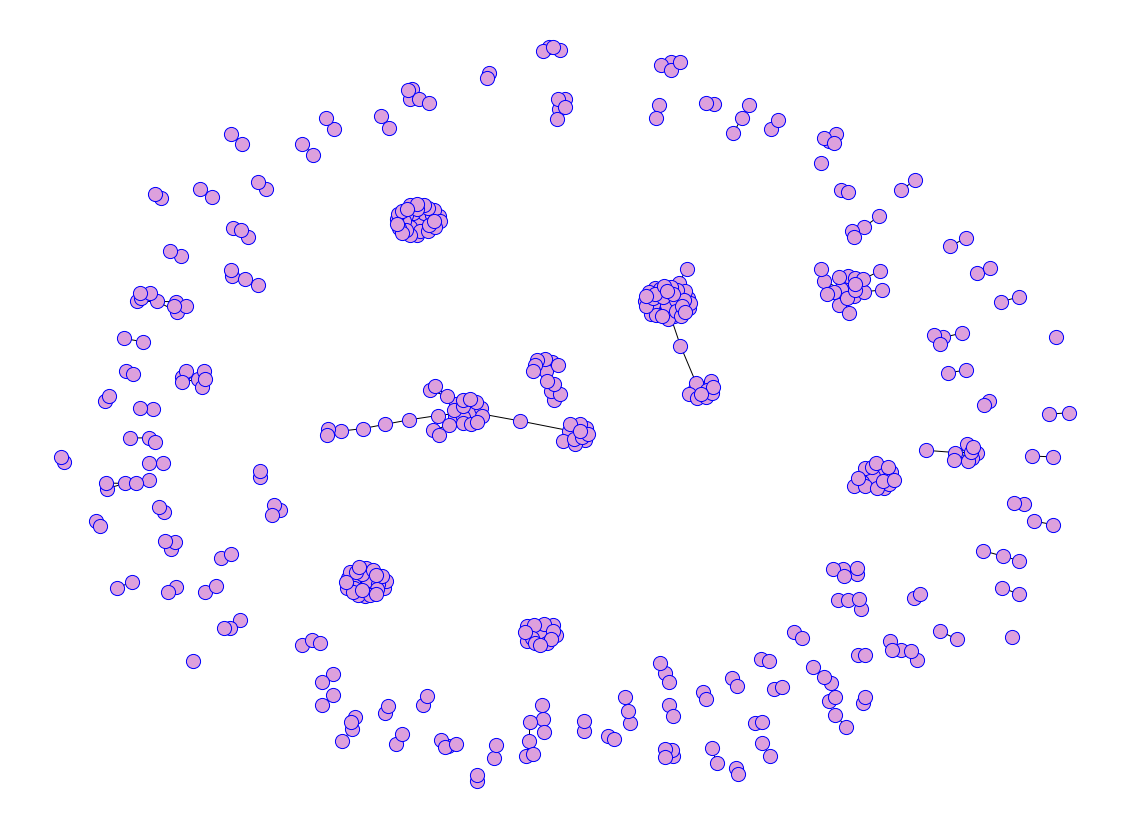

In [6]:
G_pos = nx.spring_layout(G)
nx.draw_networkx(G, G_pos, 
                with_labels=False, 
                edgecolors='blue', 
                node_color='plum', 
                node_size=200)